In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [444]:
credit_df = pd.read_csv('credit_risk_dataset.csv')

**Feature Name	Description**

person_age:	Age

person_income	Annual: Income

person_home_ownership:	Home ownership

person_emp_length:	Employment length (in years)

loan_intent:	Loan intent

loan_grade:	Loan grade

loan_amnt:	Loan amount

loan_int_rate:	Interest rate

loan_status:	Loan status (0 is non default 1 is default)

loan_percent_income:	Percent income

cb_person_default_on_file:	Historical default

cb_preson_cred_hist_length:	Credit history length

In [445]:
credit_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [446]:
credit_df.shape

(32581, 12)

In [447]:
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [448]:
credit_df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [449]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## **Considering the large number of null values in 'person_emp_length' and 'loan_int_rate' we will try to use regression imputation to predict values that can be used in place of the NaN entries**

In [450]:
from sklearn.linear_model import LinearRegression

In [451]:
# Separate data into two sets: one with missing values and one without
df_missing = credit_df[credit_df['person_emp_length'].isnull()]
df_not_missing = credit_df[~credit_df['person_emp_length'].isnull()]

In [452]:
# define the features (independent variables) and target (person_emp_length)
# use 'person_income' and 'loan_amnt' as features
features = ['person_income', 'loan_amnt']
target = 'person_emp_length'

In [453]:
# Create and fit a linear regression model on the data without missing values
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

LinearRegression()

In [454]:
# Predict the missing values
imputed_values = regression_model.predict(df_missing[features])

In [455]:
# update the DataFrame with the imputed values
credit_df.loc[credit_df['person_emp_length'].isnull(), 'person_emp_length'] = imputed_values

In [456]:
# doing the same for 'loan_int_rate'
# split into two - one with missing, the other without
df_missing = credit_df[credit_df['loan_int_rate'].isnull()]
df_not_missing = credit_df[~credit_df['loan_int_rate'].isnull()]

In [457]:
# define the features (independent variables) and target (loan_int_rate)
# using 'person_income' and 'loan_amnt' as features
features = ['person_income', 'loan_amnt']
target = 'loan_int_rate'

In [458]:
# create and fit a linear regression model on the data without missing values
regression_model = LinearRegression()
regression_model.fit(df_not_missing[features], df_not_missing[target])

LinearRegression()

In [459]:
# predict the missing values
imputed_values = regression_model.predict(df_missing[features])

In [460]:
#update the DataFrame with the imputed values
credit_df.loc[credit_df['loan_int_rate'].isnull(), 'loan_int_rate'] = imputed_values

In [461]:
credit_df.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

# **Exploratory Analysis**

In [462]:
# creating income bins column
# define the income range bins and labels
income_bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
income_labels = ['<30K', '30K-60K', '60K-90K', '90K-120K', '120K-150K', '150K+']

# Create a new column 'income_range' based on 'person_income'
credit_df['income_range'] = pd.cut(credit_df['person_income'], bins=income_bins, labels=income_labels)


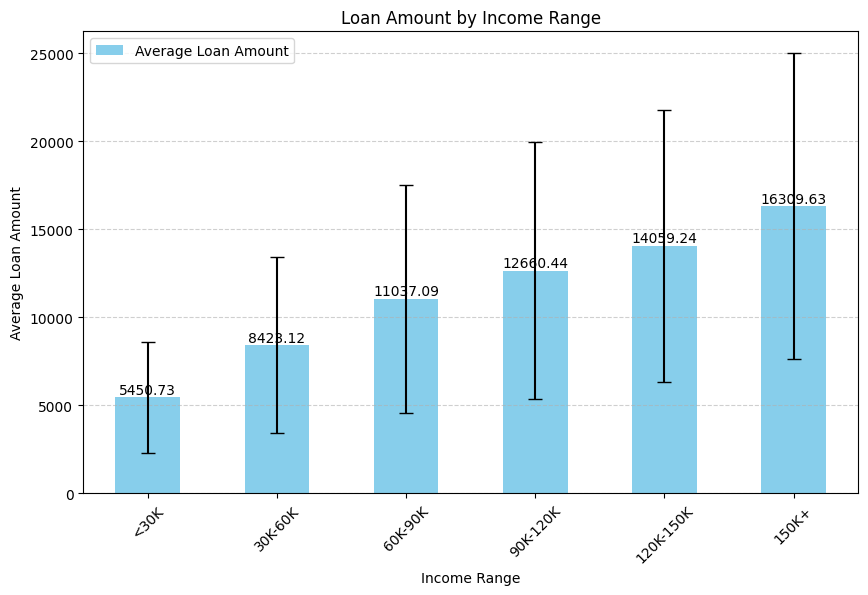

In [463]:
import matplotlib.pyplot as plt

# group the data by income range and calculate the mean loan amount in each range
income_loan_summary = credit_df.groupby('income_range')['loan_amnt'].mean()
income_loan_std = credit_df.groupby('income_range')['loan_amnt'].std()  # Standard deviation for error bars

# create a bar plot with error bars, data labels, and color coding
plt.figure(figsize=(10, 6))
ax = income_loan_summary.plot(kind='bar', color='skyblue', yerr=income_loan_std, capsize=5)
plt.title('Loan Amount by Income Range')
plt.xlabel('Income Range')
plt.ylabel('Average Loan Amount')
plt.xticks(rotation=45)

# adding data labels
for i, v in enumerate(income_loan_summary):
    ax.text(i, v + 200, f'{v:.2f}', color='black', ha='center')

# legends, gridlines and color customization
plt.legend(['Average Loan Amount'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [464]:
# conducting feature importance with a random forest classifier
X = credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']]
y = credit_df['loan_status']


In [465]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()


In [466]:
classifier.fit(X, y)


RandomForestClassifier()

In [467]:
feature_importance = classifier.feature_importances_


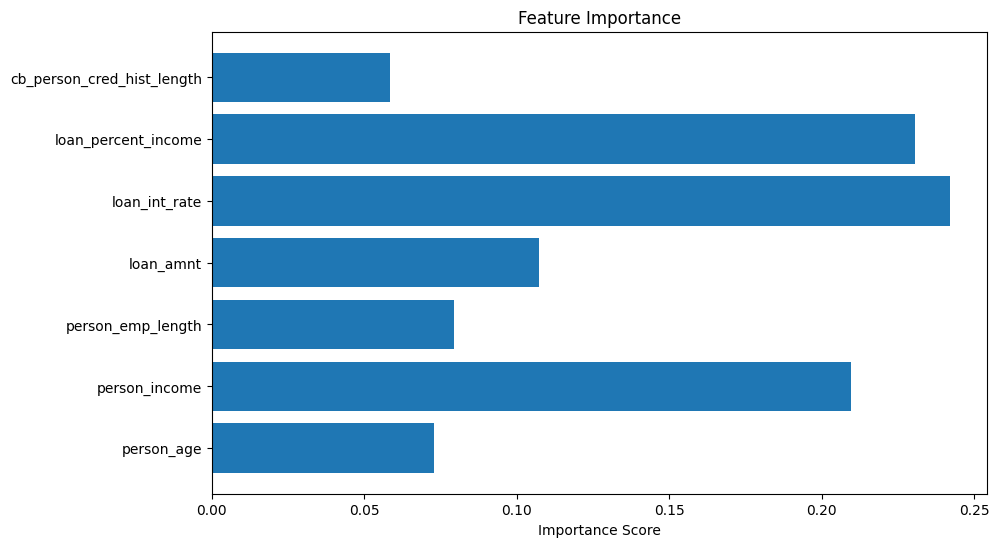

In [468]:
#plotting feature importance

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


In [469]:
from sklearn.linear_model import LogisticRegression

In [470]:
# using logistic regression to predict probable values for new "probability of default" column
# including 'cb_person_default_on_file' as a feature for this regression model
# one-hot encoding to convert 'cb_person_default_on_file' into numeric format
X = pd.get_dummies(credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'cb_person_default_on_file', 'loan_grade']], columns=['cb_person_default_on_file', 'loan_grade'], drop_first=True)

logistic_model = LogisticRegression()
logistic_model.fit(X, y)

# predicting pd
pd_values = logistic_model.predict_proba(X)[:, 1]  # Probability of Default

# adding pd values to existing dataframe
credit_df['pd'] = pd_values


In [471]:
credit_df['loan_grade'].head(10)

0    D
1    B
2    C
3    C
4    C
5    A
6    B
7    B
8    A
9    D
Name: loan_grade, dtype: object

In [472]:
credit_df['ead'] = credit_df['loan_amnt'] - credit_df['loan_amnt'] * credit_df['loan_percent_income']
# to calculate exposure at default

In [473]:
list(credit_df)

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'income_range',
 'pd',
 'ead']

In [474]:
# adding a column for loss given default using recovery rate
# calculating recovery rate
credit_df['recovery_rate'] = (credit_df['ead'] - (credit_df['pd'] * credit_df['ead'])) / credit_df['ead']

# calculating loss given default as a percentage
credit_df['lgd'] = (1 - credit_df['recovery_rate']) * 100

In [475]:
from sklearn.ensemble import RandomForestRegressor

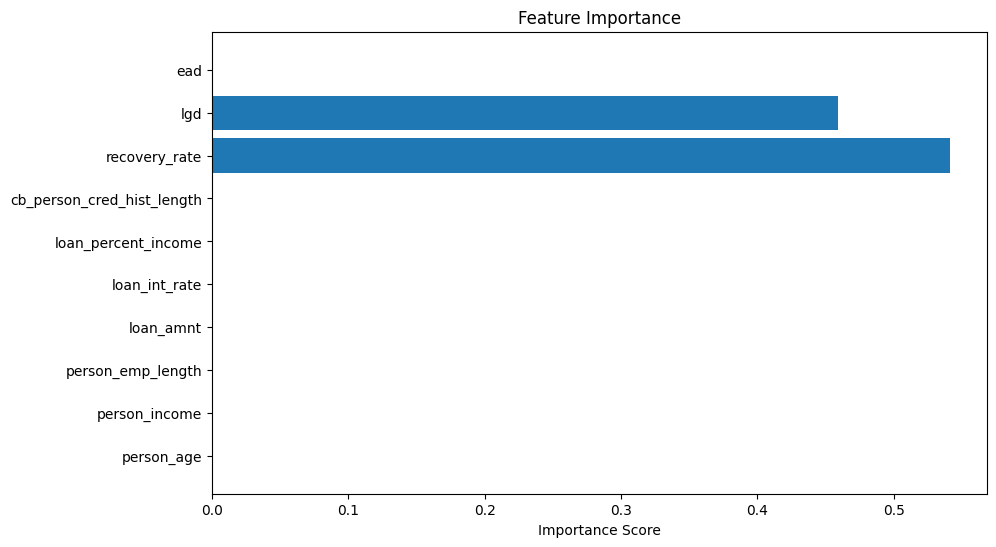

In [476]:
# running feature importance again with new columns
# switching out the y value from loan_status to pd since probability of default provides a quantfiable value for risk

# Update the import and model class to RandomForestRegressor
X = credit_df[['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'recovery_rate', 'lgd', 'ead']]
y = credit_df['pd']

# setting random forest regressor
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X, y)

# feature importance calculations
feature_importance = regressor.feature_importances_

# plot
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


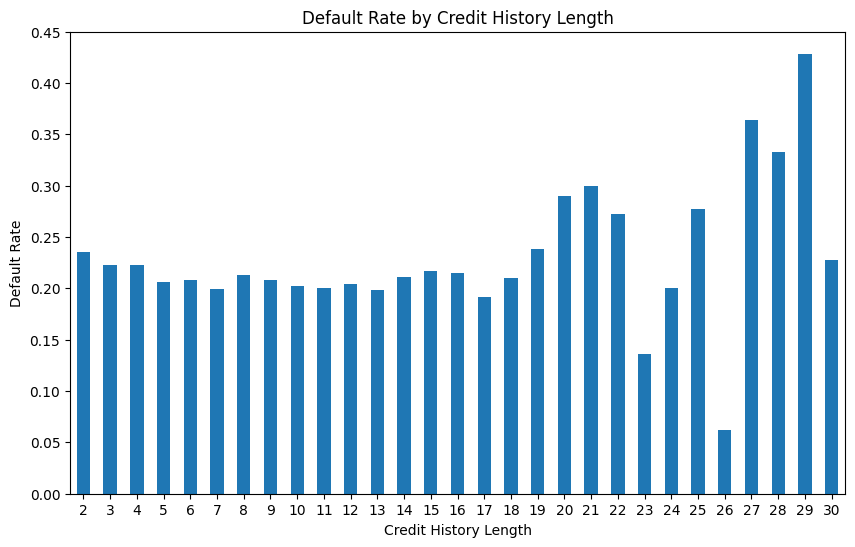

In [477]:
# group data by 'cb_person_cred_hist_length' and calculate the default rate
default_rate_by_length = credit_df.groupby('cb_person_cred_hist_length')['loan_status'].mean()

# bar plot
plt.figure(figsize=(10, 6))
default_rate_by_length.plot(kind='bar')
plt.title('Default Rate by Credit History Length')
plt.xlabel('Credit History Length')
plt.ylabel('Default Rate')
plt.xticks(rotation=0)
plt.show()


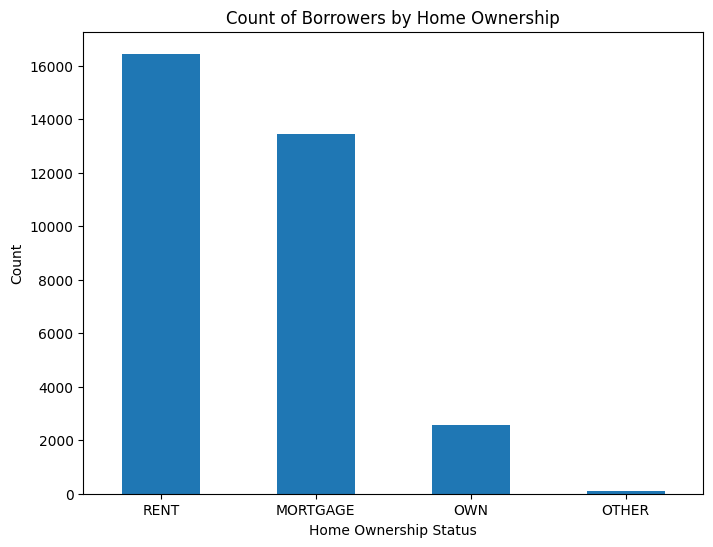

In [478]:
ownership_counts = credit_df['person_home_ownership'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
ownership_counts.plot(kind='bar')
plt.title('Count of Borrowers by Home Ownership')
plt.xlabel('Home Ownership Status')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

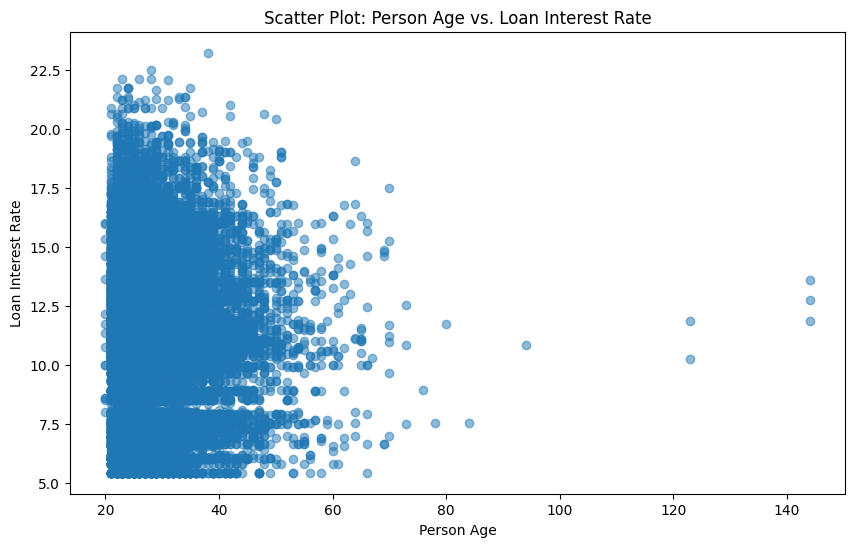

In [479]:
# Create a scatter plot for 'person_age' vs. 'loan_int_rate'
plt.figure(figsize=(10, 6))
plt.scatter(credit_df['person_age'], credit_df['loan_int_rate'], alpha=0.5)
plt.title('Scatter Plot: Person Age vs. Loan Interest Rate')
plt.xlabel('Person Age')
plt.ylabel('Loan Interest Rate')
plt.show()

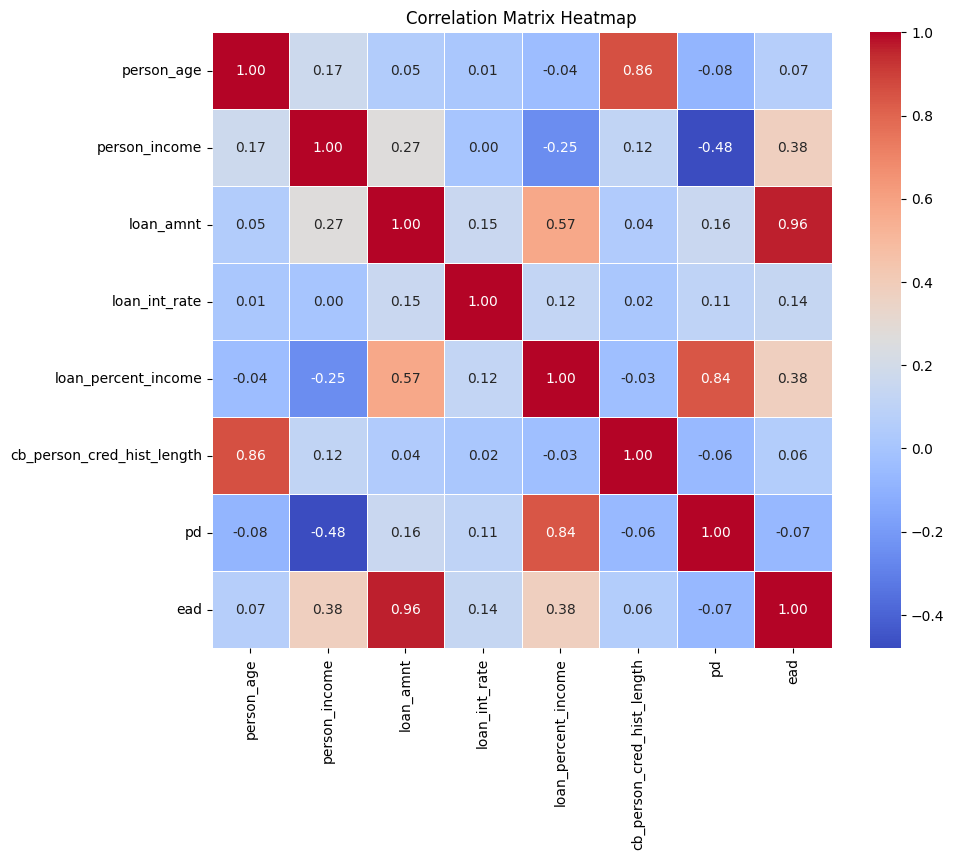

In [480]:
# correlation matrix columns
numeric_columns = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'pd', 'ead']
correlation_matrix = credit_df[numeric_columns].corr()
#heatmap to visualize
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [481]:
list(credit_df) #use a standard feedforward neural networek

['person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'income_range',
 'pd',
 'ead',
 'recovery_rate',
 'lgd']

In [482]:
credit_df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,income_range,pd,ead,recovery_rate,lgd
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,30K-60K,0.791633,14350.0,0.208367,79.163311
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,<30K,0.429506,900.0,0.570494,42.950594
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,<30K,0.548939,2365.0,0.451061,54.893923
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,60K-90K,0.744661,16450.0,0.255339,74.466130
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,30K-60K,0.820827,15750.0,0.179173,82.082658
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,<30K,0.466055,1875.0,0.533945,46.605502
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,60K-90K,0.645285,19250.0,0.354715,64.528457
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,60K-90K,0.627817,19600.0,0.372183,62.781666
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,60K-90K,0.588635,20300.0,0.411365,58.863501
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,<30K,0.441246,1344.0,0.558754,44.124576


In [483]:
credit_df.shape

(32581, 17)

**Below we use a Feed Forward Neural Network to make predictions on the loan status. By doing so, we are predicting, based on numerous factors whether or not someone will default on their loans. We use the results of the feature importance model we created earlier and use the hyperparameters with a importance score above 1**

In [484]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [485]:
# X includes all the features, including 'loan_status'
X = pd.get_dummies(credit_df[['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'cb_person_default_on_file', 'lgd', 'ead', 'recovery_rate', 'loan_status']], columns=['cb_person_default_on_file'], drop_first=True)

# target variable 'Y' is 'pd' (Probability of Default)
Y = credit_df['pd']

In [486]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_income                32581 non-null  int64  
 1   loan_amnt                    32581 non-null  int64  
 2   loan_int_rate                32581 non-null  float64
 3   loan_percent_income          32581 non-null  float64
 4   cb_person_cred_hist_length   32581 non-null  int64  
 5   lgd                          32581 non-null  float64
 6   ead                          32581 non-null  float64
 7   recovery_rate                32581 non-null  float64
 8   loan_status                  32581 non-null  int64  
 9   cb_person_default_on_file_Y  32581 non-null  uint8  
dtypes: float64(5), int64(4), uint8(1)
memory usage: 2.3 MB


In [487]:
# Data split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [488]:
# Standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [489]:
# Building FFNN for regression (predicting 'pd')
model = keras.Sequential()
model.add(layers.Input(shape=(X_train.shape[1],)))  # input layer
model.add(layers.Dense(128, activation='relu'))  # hidden layer
model.add(layers.Dropout(0.3))  # dropout layer to target potential overfitting
model.add(layers.Dense(64, activation='relu'))  # second hidden layer
model.add(layers.Dense(1, activation='linear'))  # output layer for regression

In [490]:
# Compile the model (choose the appropriate loss function and metrics)
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [491]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
815/815 [==============================] - 3s 3ms/step - loss: 0.0090 - mae: 0.0577 - mse: 0.0090 - val_loss: 5.6239e-04 - val_mae: 0.0191 - val_mse: 5.6239e-04
Epoch 2/100
815/815 [==============================] - 2s 3ms/step - loss: 0.0012 - mae: 0.0249 - mse: 0.0012 - val_loss: 3.4197e-04 - val_mae: 0.0129 - val_mse: 3.4197e-04
Epoch 3/100
815/815 [==============================] - 2s 2ms/step - loss: 6.8169e-04 - mae: 0.0180 - mse: 6.8169e-04 - val_loss: 2.3479e-04 - val_mae: 0.0120 - val_mse: 2.3479e-04
Epoch 4/100
815/815 [==============================] - 2s 3ms/step - loss: 4.6068e-04 - mae: 0.0146 - mse: 4.6068e-04 - val_loss: 1.7514e-04 - val_mae: 0.0098 - val_mse: 1.7514e-04
Epoch 5/100
815/815 [==============================] - 3s 4ms/step - loss: 3.7020e-04 - mae: 0.0127 - mse: 3.7020e-04 - val_loss: 9.6439e-05 - val_mae: 0.0063 - val_mse: 9.6439e-05
Epoch 6/100
815/815 [==============================] - 4s 5ms/step - loss: 2.7504e-04 - mae: 0.0111 - mse: 2.75

In [492]:
# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test MSE: {mse:.4f}")


204/204 [==============================] - 0s 2ms/step - loss: 0.0025 - mae: 0.0434 - mse: 0.0025
Test Loss: 0.0025, Test MAE: 0.0434, Test MSE: 0.0025


In [493]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [494]:
# Predict 'pd' values for the test data
y_pred = model.predict(X_test)


204/204 [==============================] - 0s 1ms/step


In [495]:
# Calculate the loss, MAE, and MSE
loss, mae, mse = model.evaluate(X_test, y_test)

# Display the loss and evaluation metrics
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}, Test MSE: {mse:.4f}")

204/204 [==============================] - 1s 2ms/step - loss: 0.0025 - mae: 0.0434 - mse: 0.0025
Test Loss: 0.0025, Test MAE: 0.0434, Test MSE: 0.0025


**In the above test we see a test loss of 0.0026, a test mean average error of 0.0436 and a mean squared error of 0.0026, which means this was a successful test as we are looking to reduce these values as much as possible on training and testing date**

In [496]:
y_pred.shape

(6517, 1)

In [497]:
y_test.shape

(6517,)

In [ ]:
import matplotlib.pyplot as plt


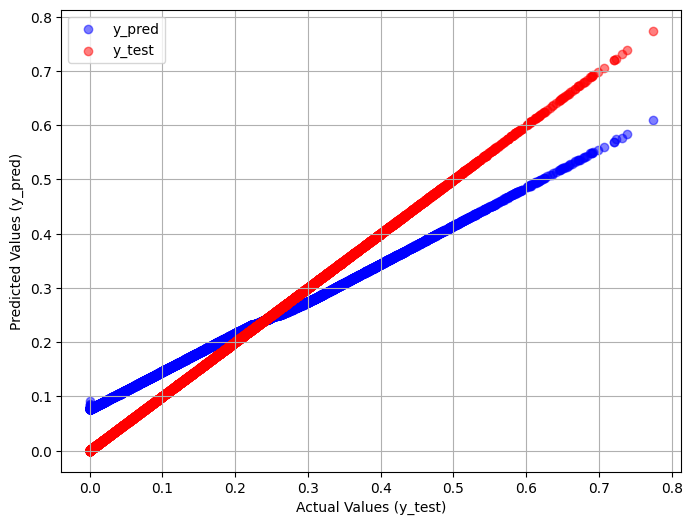

In [498]:
# Create a scatter plot with different colors for y_pred and y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='y_pred', c='blue', marker='o')
plt.scatter(y_test, y_test, alpha=0.5, label='y_test', c='red', marker='o')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.legend()
plt.show()

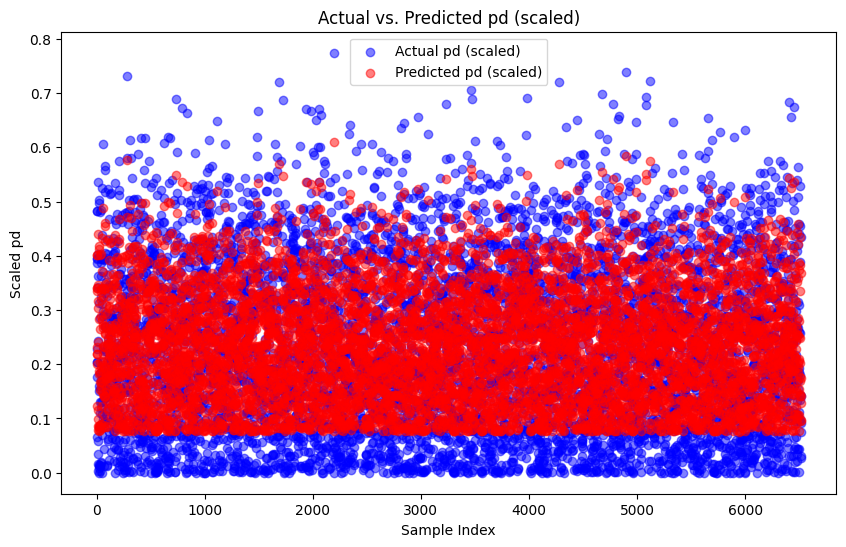

In [499]:
# scatter plot to show the predicted vs test values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual pd (scaled)', alpha=0.5)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted pd (scaled)', alpha=0.5)

plt.xlabel('Sample Index')
plt.ylabel('Scaled pd')
plt.title('Actual vs. Predicted pd (scaled)')
plt.legend()

plt.show()


**Given this information let us use the existing information like Probability of Default, Exposure at Default and Loss Given Default to create a column that displays the Expected Loss. We can take a subset of the data of all those who have defaulted on their loans and predict the expected loss from their default**